# Métodos matemátidos para físicos I

## Tensores, autovectores y autovalores

Autores:
- Nicolás Toledo Parra, 2200017
- Gabriela Sánchez Ariza, 22000816

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

Lectura de datos:

In [2]:
datos = pd.read_excel('datosbancomundial.xlsx')
datos = datos.drop("Año", 1)
datos

,Ciencia y tecnología,Salud,Defensa,Educación
0,0.15353,5.798928,3.465015,4.07935
1,0.15086,6.067098,3.352873,4.02099
2,0.14950,6.335515,3.276131,3.91672
3,0.18455,6.491028,3.266740,4.08301
4,0.20125,6.841927,3.744606,3.93878
5,0.19608,7.311347,3.885354,4.77652
6,0.19501,7.071301,3.642756,4.83383
7,0.20595,6.780768,3.081614,4.46608
8,0.23378,6.745996,3.158960,4.37039
9,0.27111,7.017241,3.274401,4.87855


In [3]:
ciencia = datos['Ciencia y tecnología'].to_list()
salud = datos['Salud'].to_list()
defensa = datos['Defensa'].to_list()
educacion = datos['Educación'].to_list()

data = np.array([ciencia,salud,defensa,educacion])

### a) Matriz de covarianza y matriz de correlación:

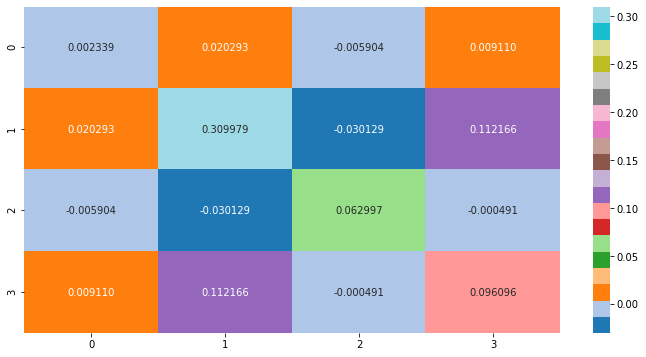

In [4]:
plt.figure(figsize=(12,6))
cov_matrix = np.cov(data, bias=True)
sn.heatmap(cov_matrix, annot=True, fmt='f', cmap="tab20")
plt.show()

In [5]:
matr = datos.corr()
matr

,Ciencia y tecnología,Salud,Defensa,Educación
Ciencia y tecnología,1.000000,0.753629,-0.486384,0.607650
Salud,0.753629,1.000000,-0.215604,0.649893
Defensa,-0.486384,-0.215604,1.000000,-0.006307
Educación,0.607650,0.649893,-0.006307,1.000000


### b y c):

In [6]:
print(cov_matrix)

[[ 0.00233917  0.02029339 -0.00590431  0.00911038]
 [ 0.02029339  0.30997901 -0.03012887  0.11216563]
 [-0.00590431 -0.03012887  0.06299668 -0.00049069]
 [ 0.00911038  0.11216563 -0.00049069  0.09609571]]


In [7]:
eigenvalores, matriztransf = np.linalg.eig(cov_matrix)
print(eigenvalores)
print(matriztransf)

[0.36206251 0.0006357  0.06728233 0.04143003]
[[-0.06297087 -0.99534989  0.04550954  0.05693992]
 [-0.91465725  0.04146357  0.12102433 -0.38345273]
 [ 0.09402548 -0.07384556 -0.85626105 -0.50251671]
 [-0.388067    0.04589344 -0.50009899  0.77278639]]


In [8]:
matriztransf_inv = np.linalg.inv(matriztransf) #Punto C matriz transformación
matriztransf_inv

array([[-0.06297087, -0.91465725,  0.09402548, -0.388067  ],
       [-0.99534989,  0.04146357, -0.07384556,  0.04589344],
       [ 0.04550954,  0.12102433, -0.85626105, -0.50009899],
       [ 0.05693992, -0.38345273, -0.50251671,  0.77278639]])

In [9]:
diagonalmatrix = np.matmul(matriztransf_inv, (np.matmul(cov_matrix, matriztransf)))
print(diagonalmatrix)

[[ 3.62062509e-01  1.64663205e-18 -6.93889390e-18 -3.55618313e-17]
 [ 2.04697370e-16  6.35698000e-04 -3.68628739e-18 -2.81892565e-18]
 [ 3.46944695e-17 -1.76521666e-18  6.72823313e-02 -1.73472348e-17]
 [-9.02056208e-17  5.40407020e-18  3.46944695e-18  4.14300327e-02]]


In [10]:
np.matmul(matriztransf, (np.matmul(diagonalmatrix, matriztransf_inv)))

array([[ 0.00233917,  0.02029339, -0.00590431,  0.00911038],
       [ 0.02029339,  0.30997901, -0.03012887,  0.11216563],
       [-0.00590431, -0.03012887,  0.06299668, -0.00049069],
       [ 0.00911038,  0.11216563, -0.00049069,  0.09609571]])